## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [1]:
import torch
import torch.nn as nn
from collections import OrderedDict

In [2]:
# in 2 bits
# out 1 bit, carry 1 bit

# your code here
model1 = nn.Sequential(OrderedDict([
          ('input', nn.Linear(2, 5)),
          ('relu1', nn.ReLU()),
          ('output', nn.Linear(5, 2)),
          ('sigmoid', nn.Sigmoid())
        ]))

model2 = nn.Sequential(OrderedDict([
          ('input', nn.Linear(2, 10)),
          ('relu1', nn.ReLU()),
          ('output', nn.Linear(10, 2)),
          ('sigmoid', nn.Sigmoid())
        ]))

model3 = nn.Sequential(OrderedDict([
          ('input', nn.Linear(2, 8)),
          ('relu1', nn.ReLU()),
          ('output', nn.Linear(8, 6)),
          ('relu2', nn.ReLU()),
          ('output2', nn.Linear(6, 4)),
          ('relu3', nn.ReLU()),
          ('output3', nn.Linear(4, 2)),
          ('sigmoid', nn.Sigmoid())
        ]))

In [3]:
print(model1)

Sequential(
  (input): Linear(in_features=2, out_features=5, bias=True)
  (relu1): ReLU()
  (output): Linear(in_features=5, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)


In [4]:
print(model2)

Sequential(
  (input): Linear(in_features=2, out_features=10, bias=True)
  (relu1): ReLU()
  (output): Linear(in_features=10, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)


In [5]:
print(model3)

Sequential(
  (input): Linear(in_features=2, out_features=8, bias=True)
  (relu1): ReLU()
  (output): Linear(in_features=8, out_features=6, bias=True)
  (relu2): ReLU()
  (output2): Linear(in_features=6, out_features=4, bias=True)
  (relu3): ReLU()
  (output3): Linear(in_features=4, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)


In [6]:
data_in = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
print(data_in)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [7]:
data_target = torch.tensor([[0, 0],[1, 0],[1, 0],[1, 1]], dtype=torch.float32)
print(data_target)

tensor([[0., 0.],
        [1., 0.],
        [1., 0.],
        [1., 1.]])


In [8]:
criterion1 = torch.nn.BCELoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.01)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.01)
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.01)

In [9]:
def train_model(model, data_in, data_target, criterion, optimizer, num_epochs):
    
    losses = []
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(data_in)
        loss = criterion(outputs, data_target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}')

    print("Training complete")

    return loss.item(), losses


test_data = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
test_target = torch.tensor([[0, 0],[1, 0],[1, 0],[1, 1]], dtype=torch.float32)

def test_model(model, data_in, data_target):
    with torch.no_grad():
        outputs = model(data_in)
    predicted = (outputs > 0.5).float()

    print("Predicted:")
    print(predicted)
    print("Target:")
    print(test_target)
    
    print("accuracy:")
    print(torch.sum(predicted == data_target) / len(data_target))

    return torch.sum(predicted == data_target).item() / (data_target.numel())

In [10]:
loss1, losses1 = train_model(model1, data_in, data_target, criterion1, optimizer1, 400)
acc1 = test_model(model1, test_data, test_target)

loss2, losses2 = train_model(model2, data_in, data_target, criterion1, optimizer2, 400)
acc2 = test_model(model2, test_data, test_target)

loss3, losses3 = train_model(model3, data_in, data_target, criterion1, optimizer3, 400)
acc3 = test_model(model3, test_data, test_target)

print(f"Model 1: Loss: {loss1}, Accuracy: {acc1}")
print(f"Model 2: Loss: {loss2}, Accuracy: {acc2}")
print(f"Model 3: Loss: {loss3}, Accuracy: {acc3}")

Epoch 400/400, Loss: 0.0090
Training complete
Predicted:
tensor([[0., 0.],
        [1., 0.],
        [1., 0.],
        [1., 1.]])
Target:
tensor([[0., 0.],
        [1., 0.],
        [1., 0.],
        [1., 1.]])
accuracy:
tensor(2.)
Epoch 400/400, Loss: 0.0038
Training complete
Predicted:
tensor([[0., 0.],
        [1., 0.],
        [1., 0.],
        [1., 1.]])
Target:
tensor([[0., 0.],
        [1., 0.],
        [1., 0.],
        [1., 1.]])
accuracy:
tensor(2.)
Epoch 400/400, Loss: 0.5623
Training complete
Predicted:
tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]])
Target:
tensor([[0., 0.],
        [1., 0.],
        [1., 0.],
        [1., 1.]])
accuracy:
tensor(1.5000)
Model 1: Loss: 0.008964397013187408, Accuracy: 1.0
Model 2: Loss: 0.003786724526435137, Accuracy: 1.0
Model 3: Loss: 0.5623496770858765, Accuracy: 0.75


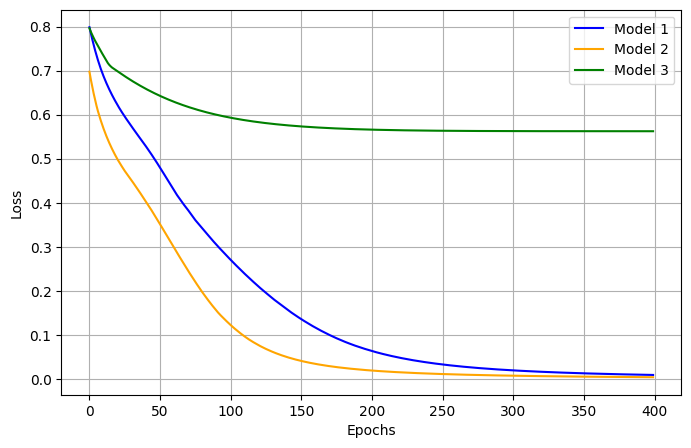

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(losses1, label="Model 1", color='blue')
plt.plot(losses2, label="Model 2", color='orange')
plt.plot(losses3, label="Model 3", color='green')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.show()

In [12]:
print(model1.state_dict())

OrderedDict({'input.weight': tensor([[-0.0107, -0.6810],
        [ 0.3485,  0.2264],
        [ 2.3890,  2.9126],
        [-2.1290, -0.3097],
        [ 2.0467, -2.0468]]), 'input.bias': tensor([-3.8439e-01, -2.2601e-01,  1.1278e-05,  3.5385e+00, -3.7955e-05]), 'output.weight': tensor([[ 0.2781,  0.0904,  2.5519, -0.8784,  0.7740],
        [ 0.0441,  0.6458,  1.6007, -2.4259, -2.2203]]), 'output.bias': tensor([-0.4576, -1.2651])})


In [13]:
print(model2.state_dict())

OrderedDict({'input.weight': tensor([[ 0.0942, -0.2106],
        [ 2.5517,  0.8397],
        [ 1.6479,  2.3692],
        [-1.8909,  1.8911],
        [ 0.0377,  0.5019],
        [-1.8907, -0.1088],
        [ 0.1029, -1.9125],
        [-0.2386,  0.4408],
        [ 2.0449,  1.3877],
        [ 0.8490,  1.2754]]), 'input.bias': tensor([-2.0217e-01,  5.2151e-05, -9.1959e-05, -1.8389e-04, -8.0911e-01,
         1.9998e+00,  2.6073e+00, -6.5759e-01,  1.2455e-05, -8.4832e-01]), 'output.weight': tensor([[-1.5838e-03,  1.2272e+00,  1.3083e+00,  1.9293e+00, -5.7967e-02,
         -1.3768e+00, -6.5304e-01, -1.5096e-01,  1.2704e+00,  1.6094e-01],
        [ 3.5455e-02, -2.8029e-01,  1.2597e+00, -2.0879e+00, -1.5481e-01,
         -1.5763e+00, -2.1666e+00, -1.7134e-01,  5.0766e-01,  1.8732e+00]]), 'output.bias': tensor([-0.3823, -1.3629])})


In [14]:
print(model3.state_dict())

OrderedDict({'input.weight': tensor([[ 0.0493,  0.2232],
        [-0.6691, -0.1291],
        [-0.5892, -0.5623],
        [-0.1374,  0.3925],
        [ 0.2205, -0.2437],
        [ 0.4116,  0.5014],
        [ 0.6807,  0.2354],
        [ 0.4846, -0.3082]]), 'input.bias': tensor([ 0.2948, -0.0797,  0.5235, -0.2766,  0.7528, -0.0244,  0.6382, -0.3004]), 'output.weight': tensor([[-0.1555, -0.1347,  0.5138, -0.0839,  0.2763, -0.3839, -0.3182,  0.1176],
        [-0.2680,  0.2467, -0.2368, -0.0768, -0.3132, -0.2445, -0.2865,  0.0232],
        [-0.2490,  0.0196,  0.0421,  0.0750, -0.2950, -0.2374,  0.1135, -0.2794],
        [-0.1066,  0.1538,  0.2386,  0.0273, -0.0675,  0.3157, -0.1761,  0.1386],
        [ 0.2048,  0.1839, -0.4625,  0.2876,  0.4629,  0.4884,  0.0459,  0.3811],
        [-0.0080, -0.3497, -0.4948,  0.0849,  0.5009,  0.3907,  0.4287,  0.2318]]), 'output.bias': tensor([ 0.1111, -0.2514,  0.0065,  0.0045,  0.3195,  0.4040]), 'output2.weight': tensor([[ 0.1538,  0.0864, -0.2601, -0.09